<a href="https://colab.research.google.com/github/fasthill/My-gist/blob/main/eda_plot/kaggle_fe_begin_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/learn/feature-engineering

In [1]:
import pandas as pd
import numpy as np

수정된 데이터를 사용하므로 다음과 같은 절차는 필요없음
```
!pip install xlrd==1.2.0
!pip show xlrd

import xlrd
```
```
원래 데이터 위치
url = "https://raw.githubusercontent.com/fasthill/My-gist/main/data/concrete/Concrete_Data.xls"
df = pd.read_excel(url)

import re  # column명을 수정하기 위하여 수행
new_name_column = [re.match(r'^[a-zA-Z0-9_ ]*', x)[0].replace(' ','') for x in df.columns]
df.columns = new_name_column
```


In [2]:
url = "https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/concrete.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

First encountering a new dataset can sometimes feel overwhelming. You might be presented with hundreds or thousands of features without even a description to go by. Where do you even begin?

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

In [53]:
url_auto = 'https://raw.githubusercontent.com/fasthill/My-gist/main/data/Kaggle_FE_Course_Data/autos.csv'
df = pd.read_csv(url_auto)

In [54]:
df.head()

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel_type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num_of_doors       193 non-null    int64  
 5   body_style         193 non-null    object 
 6   drive_wheels       193 non-null    object 
 7   engine_location    193 non-null    object 
 8   wheel_base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb_weight        193 non-null    int64  
 13  engine_type        193 non-null    object 
 14  num_of_cylinders   193 non-null    int64  
 15  engine_size        193 non-null    int64  
 16  fuel_system        193 non

In [56]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
    #pd.factorize()는 2가지 값을 반환: 첫번째 값은 정수로 인코딩된 값, 두번째 값은 인코딩된 범주

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [57]:
X.shape

(193, 24)

In [58]:
discrete_features 

symboling             True
make                  True
fuel_type             True
aspiration            True
num_of_doors          True
body_style            True
drive_wheels          True
engine_location       True
wheel_base           False
length               False
width                False
height               False
curb_weight           True
engine_type           True
num_of_cylinders      True
engine_size           True
fuel_system           True
bore                 False
stroke               False
compression_ratio     True
horsepower            True
peak_rpm              True
city_mpg              True
highway_mpg           True
dtype: bool

```
# number인 column을 숫자열로 변환
for colname in df.select_dtypes('object').columns:
    if df[colname].str.contains(r'\d+.?\d*[^a-zA-Z]').any(): # 숫자(.숫자)이면서 문자로 이어지지 않는 형식
        df[colname] = pd.to_numeric(df[colname], errors='coerce').astype('float')
```

In [59]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [60]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [61]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb_weight          1.574336
highway_mpg          0.955053
length               0.615345
bore                 0.485624
stroke               0.383565
num_of_cylinders     0.329184
compression_ratio    0.133412
fuel_type            0.047279
Name: MI Scores, dtype: float64

In [62]:
def plot_mi_scores(scores):
  scores = scores.sort_values(ascending=True)
  width = np.arange(len(scores))
  ticks = list(scores.index)
  plt.barh(width, scores)
  plt.yticks(width, ticks)
  plt.title('Mutual Information Scores')

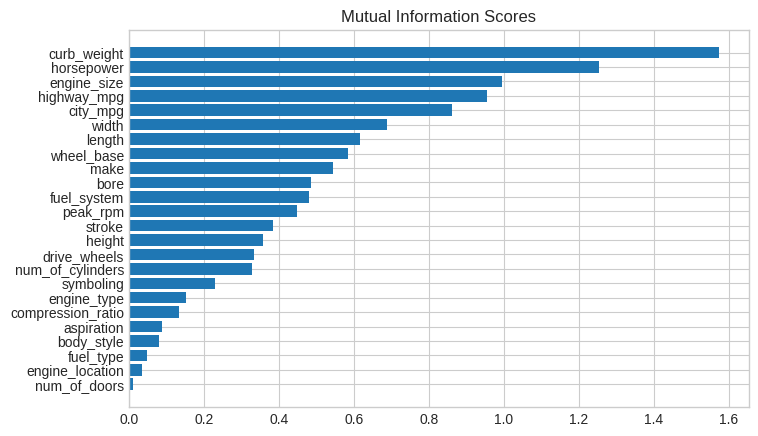

In [63]:
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores)

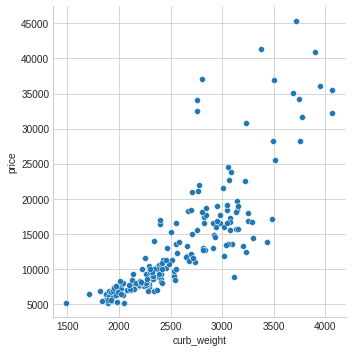

In [64]:
sns.relplot(x='curb_weight', y='price', data=df)

The fuel_type feature has a fairly low MI score, but as we can see from the figure, it clearly separates two price populations with different trends within the horsepower feature. This indicates that fuel_type contributes an interaction effect and might not be unimportant after all. Before deciding a feature is unimportant from its MI score, it's good to investigate any possible interaction effects -- domain knowledge can offer a lot of guidance here.

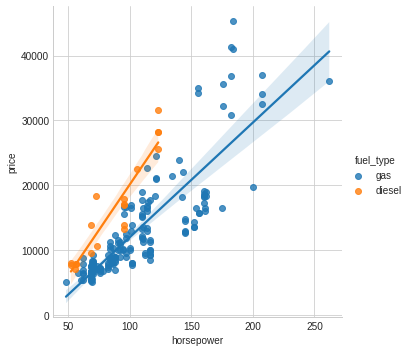

In [70]:
sns.lmplot(x='horsepower', y='price', hue='fuel_type', data=df)